In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from config import *
from functions import *
from sim import *
from read_ramses import *


### SNe

In [112]:
def kroupa(m):
    imf = np.zeros_like(m)
    imf[m < 0.08] = 25 * m[m < 0.08]**(-0.3)
    imf[(m > 0.08) * (m < 0.5)] = 2 * m[(m > 0.08) * (m < 0.5)]**(-1.3)
    imf[(m > 0.5) * (m < 1.0)] = m[(m > 0.5) * (m < 1.0)]**(-2.3)
    imf[m > 1.0] = m[m > 1.0]**(-3.7)
    return imf

m = np.logspace(-2, 1)
imf = kroupa(m)

np.sum()


In [113]:
m_SNe = 8 # mass above which Type II SNe occur

kroupa_norm = 25 / (-0.3 + 2) * 0.08**(-0.3 + 2) \
    + 2 / (-1.3 + 2) * (0.5**(-1.3 + 2) - 0.08**(-1.3 + 2)) \
    + 1 / (-2.3 + 2) * (1.0**(-2.3 + 2) - 0.5**(-2.3 + 2)) \
    + -1 / (-2.7 + 2) * 1.0**(-2.7 + 2) # integral of the Kroupa IMF
kroupa_SNe = -1 / (-2.7 + 2) * m_SNe**(-2.7 + 2) # integral of the Kroupa IMF above m_SNe
eps_SNe = kroupa_SNe / kroupa_norm # mass fraction of stars that go SNe

eps_SNe


0.0907728971746926

### timescales

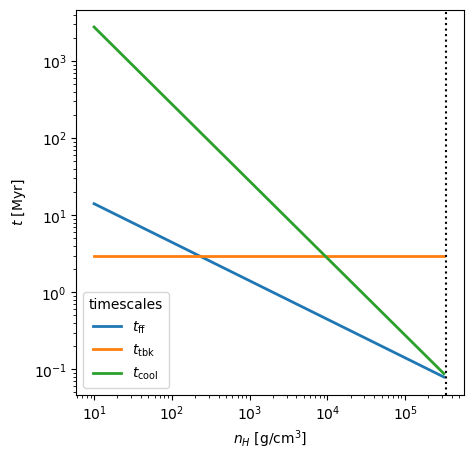

In [92]:
num = 100
metallicity = 0.1 * const.Z_sol
temp = 10**4
C = 1

n_H = np.logspace(1, 5.5, num) # Hydrogen number density
rho = n_H * const.m_H / const.X_cosmo
t_ff = np.sqrt(3 * np.pi / (32 * const.G * rho))
t_fbk = np.full_like(rho, 3 * const.Myr)
t_cool = 0.87 * const.Myr * (n_H / 10**3.5)**(-1) * (metallicity / const.Z_sol)**(-1) * (temp / 10**4) * np.exp(0.009 * (temp / 10**4)**(-1)) * C**(-1)
n_cool = 3.4e3 * (metallicity / const.Z_sol)**(-2) * (temp / 10**4)**2 * C**(-2)

plt.figure(figsize=(5, 5))

plt.plot(n_H, t_ff / const.Myr, lw=2, label=r'$t_{\rm ff}$')
plt.plot(n_H, t_fbk / const.Myr, lw=2, label=r'$t_{\rm tbk}$')
plt.plot(n_H, t_cool / const.Myr, lw=2, label=r'$t_{\rm cool}$')
plt.axvline(x=n_cool, color='black', linestyle=':')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$n_H$ [${\rm g/cm^3}$]')
plt.ylabel(r'$t$ [${\rm Myr}$]')
plt.legend(title='timescales')


Saved figure as 'tstar_mstar100-012420241803.png'


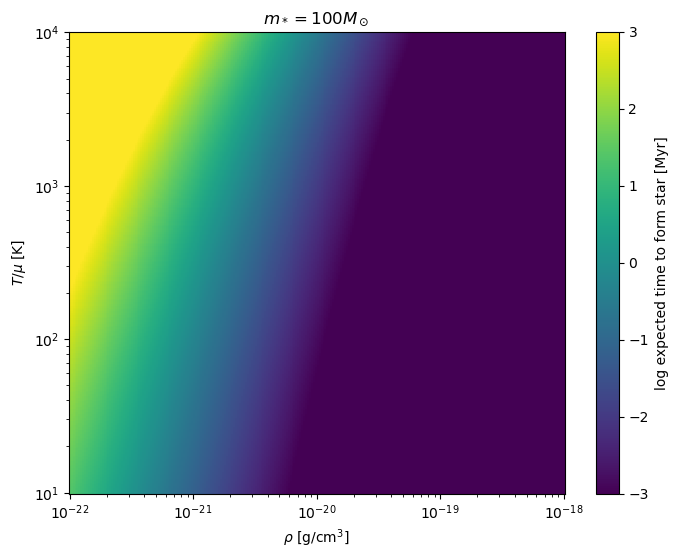

In [67]:
plt.figure(figsize=(8, 6))

dx = 10 * const.pc
b_turb = 1.0
energy_turb = 1e14
m_star = 100 * const.M_sol
dt = 500 * const.yr

density, temp = np.meshgrid(np.logspace(-22, -18, 256), np.logspace(1, 4, 256))
eps_sf = calc_eps_sf2(density, energy_turb, temp, dx, b_turb)
t_ff = np.sqrt(3 * np.pi / (32 * const.G * density))
m_gas = eps_sf * density / t_ff * dx**3 * dt
avg = m_gas / m_star
deltat = -np.log(1 - 0.5) / avg * dt

plt.pcolormesh(density, temp, np.log10(deltat / const.Myr), vmin=-3, vmax=3)
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='log expected time to form star [Myr]')
plt.xlabel(r'$\rho$ [${\rm g/cm^3}$]')
plt.ylabel(r'$T/\mu$ [${\rm K}$]')
plt.title(r'$m_* = 100 M_\odot$')

save_fig('tstar_mstar100')


In [16]:
prob = 0.5 # order unity probability
avg = 0.0001 # expected value of the poisson distribution
ntstep = -np.log(1 - prob) / avg # expected number of timesteps until nonzero number of star particles
tstep = 500 * const.yr

print(ntstep)
print(ntstep * tstep / const.Myr)


6931.471805599453
3.4657359027997265
